# Table of Contents

1. [Logic Gates](#Logic-Gates)
2. [Perceptron Demo](#Perceptron-Demo)
3. [Perceptron Trick](#Perceptron-Trick)
4. [Perceptron Loss Function](#Perceptron-Loss-Function)
5. [Problems with Perceptron](#Problems-with-Perceptron)


### Perceptron Demo

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df=pd.read_csv('/content/placement.csv')

In [103]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


<Axes: xlabel='cgpa', ylabel='resume_score'>

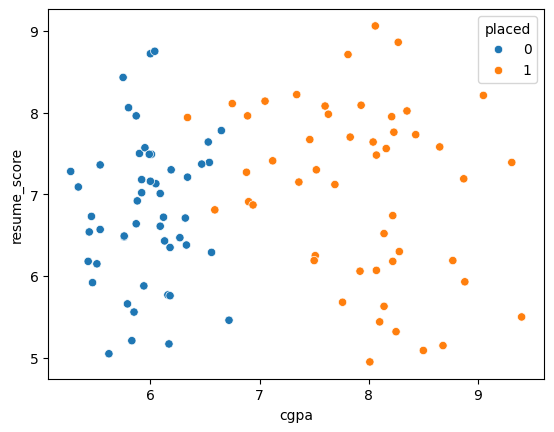

In [104]:
sns.scatterplot(x=df['cgpa'],y=df['resume_score'],hue=df['placed'])

In [105]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [106]:
from sklearn.linear_model import Perceptron
p=Perceptron()

In [107]:
p.fit(X,y)

Perceptron()

In [108]:
p.coef_

array([[ 40.26, -36.  ]])

In [109]:
p.intercept_

array([-25.])

In [110]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

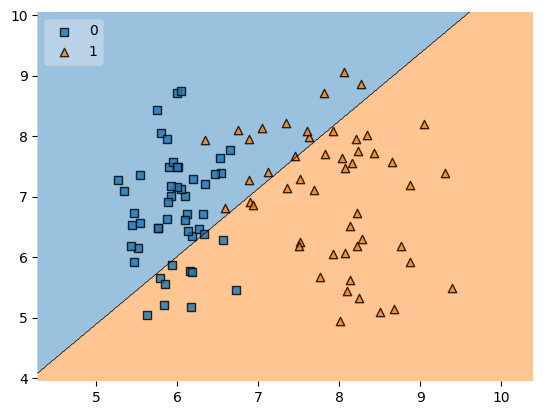

In [111]:
plot_decision_regions(X.values,y.values,clf=p,legend=2)

### Perceptron Trick

In [112]:
from sklearn.datasets import make_classification
import numpy as np
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                        n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

In [113]:
import matplotlib.pyplot as plt

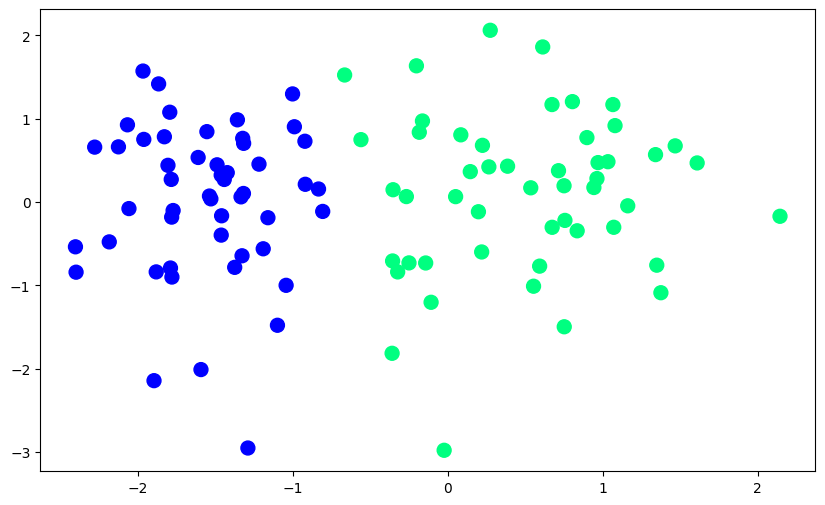

In [114]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [115]:
def perceptron(X,y):
  X=np.insert(X,0,1,axis=1)
  weights=np.ones(X.shape[1])
  lr=0.1

  for i in range(1000):
    j=np.random.randint(0,100)
    y_hat=step(np.dot(X[j],weights))
    weights=weights+lr*(y[j]-y_hat)*X[j]

  return weights[0],weights[1:]

In [116]:
def step(z):
  return 1 if z>0 else 0

In [117]:
intercept_,coef_=perceptron(X,y)

In [118]:
print(coef_)
print(intercept_)

[1.31367356 0.08890505]
1.0


In [119]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [120]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+b

(-3.0, 2.0)

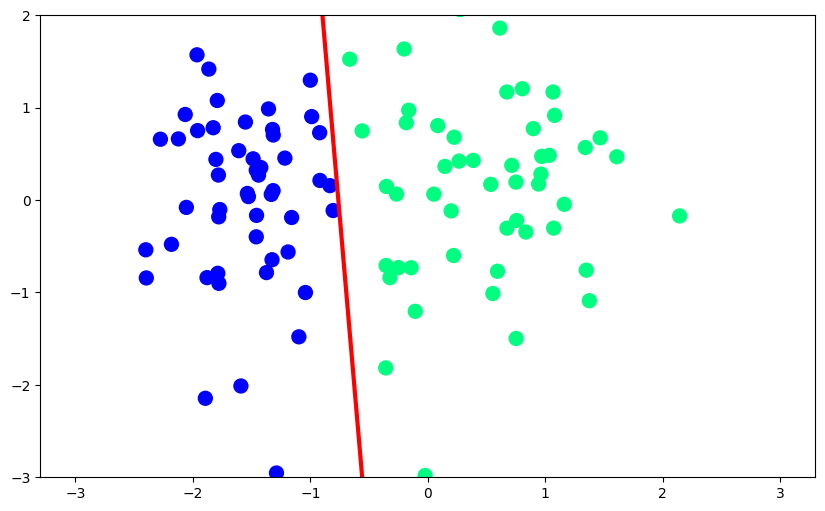

In [121]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### Perceptron Loss Function

In [122]:
from sklearn.datasets import make_classification
import numpy as np
X,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                        n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=15)

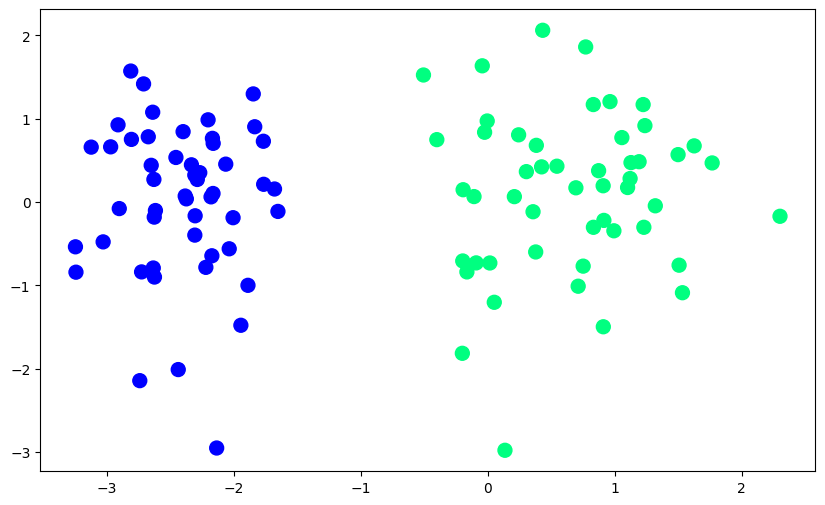

In [123]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [124]:
def perceptron(X,y):
  w1=w2=b=1
  lr=0.1

  for j in range(1000):
    for i in range(X.shape[0]):
      z=w1*X[i][0]+w2*X[i][1]+b
      if z*y[i]<0:
        w1=w1+lr*y[i]*X[i][0]
        w2=w2+lr*y[i]*X[i][1]
        b=b+lr*y[i]

  return w1,w2,b

In [125]:
w1,w2,b=perceptron(X,y)

In [126]:
m=-(w1/w2)
c=-(b/w2)

print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

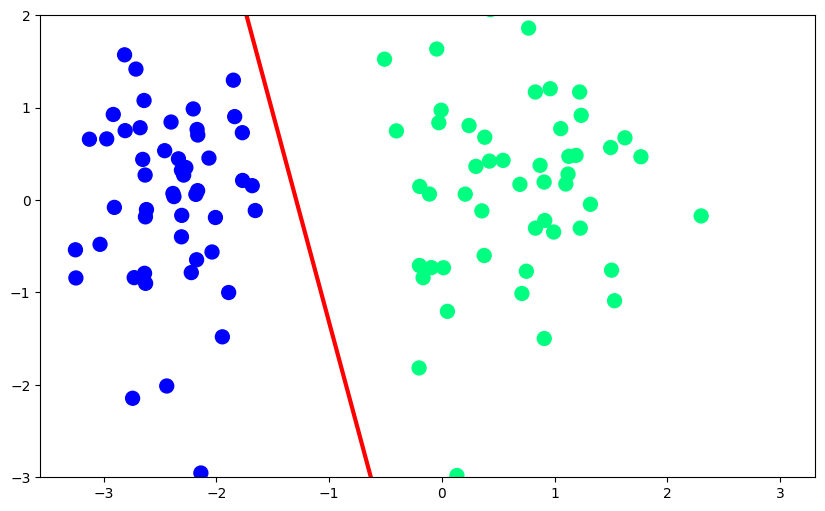

In [127]:
x_input=np.linspace(-3,3,100)
y_input=m*x_input+c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

### Problems with Perceptron

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

In [129]:
or_data=pd.DataFrame()
and_data=pd.DataFrame()
xor_data=pd.DataFrame()


In [130]:
or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['output']=[1,1,1,0]

In [131]:
and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['output']=[1,0,0,0]

In [132]:
xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['output']=[0,1,1,0]

In [133]:
and_data

,input1,input2,output
0,1,1,1
1,1,0,0
2,0,1,0
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

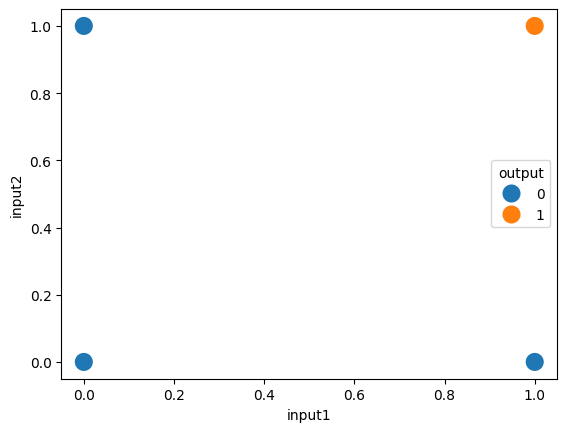

In [134]:
sns.scatterplot(x=and_data['input1'],y=and_data['input2'],hue=and_data['output'],s=200)

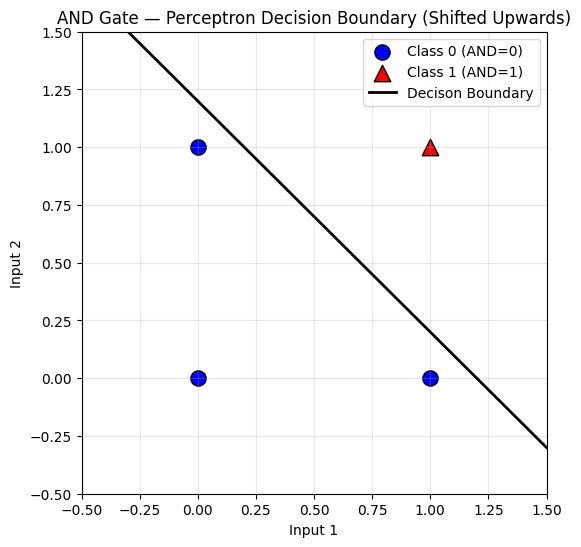

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# ----------------------
# AND gate truth table
# ----------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=float)

y = np.array([0, 0, 0, 1], dtype=int)  # AND labels

# ----------------------
# Train perceptron
# ----------------------
clf = Perceptron(max_iter=1000, tol=1e-3, random_state=0)
clf.fit(X, y)

# Get learned weights and bias
w1, w2 = clf.coef_[0]
b = clf.intercept_[0]

# ----------------------
# Compute original decision boundary
# ----------------------
x_vals = np.linspace(-0.5, 1.5, 200)
y_vals = -(w1 * x_vals + b) / w2

# ----------------------
# Shift boundary upward by delta_y
# ----------------------
delta_y = 0.2   # change this to move more/less
b_shifted = b - delta_y * w2
y_vals_shifted = -(w1 * x_vals + b_shifted) / w2

# ----------------------
# Plotting
# ----------------------
plt.figure(figsize=(6, 6))

# Training points
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', s=120, edgecolor='k', label='Class 0 (AND=0)')
plt.scatter(X[y==1, 0], X[y==1, 1], color='red', s=140, marker='^', edgecolor='k', label='Class 1 (AND=1)')

# Decision boundaries
#plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='Original boundary')
plt.plot(x_vals, y_vals_shifted, 'k-', linewidth=2, label=f'Decison Boundary')

# Formatting
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("AND Gate — Perceptron Decision Boundary (Shifted Upwards)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [136]:
or_data

,input1,input2,output
0,1,1,1
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

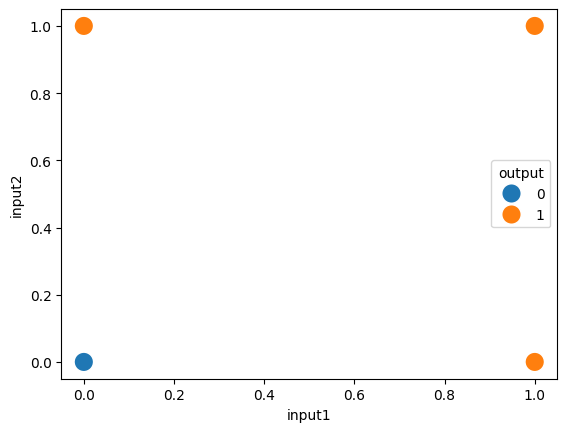

In [137]:
sns.scatterplot(x=or_data['input1'],y=or_data['input2'],hue=or_data['output'],s=200)

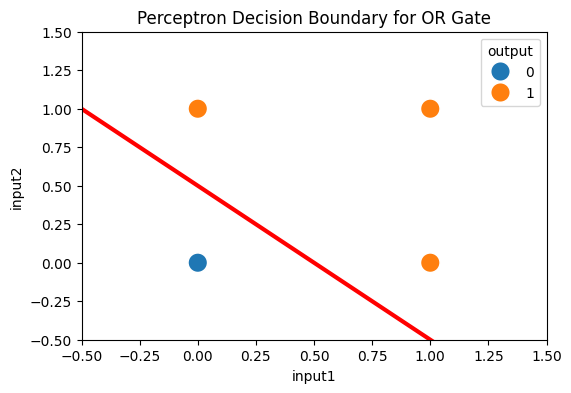

In [138]:
# Plotting the decision boundary for the OR gate

# Get the coefficients and intercept from the trained perceptron for OR gate
w1_or = clf2.coef_[0][0]
w2_or = clf2.coef_[0][1]
b_or = clf2.intercept_[0]

# Define the x range for the decision boundary line
x_input_or = np.linspace(-0.5, 1.5, 100)

# Calculate the corresponding y values for the decision boundary line (w1*x + w2*y + b = 0)
y_input_or = -(w1_or * x_input_or + b_or) / w2_or

# Plot the data points
plt.figure(figsize=(6, 4))
sns.scatterplot(x=or_data['input1'], y=or_data['input2'], hue=or_data['output'], s=200)

# Plot the decision boundary line
plt.plot(x_input_or, y_input_or, color='red', linewidth=3)

plt.xlabel('input1')
plt.ylabel('input2')
plt.title('Perceptron Decision Boundary for OR Gate')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

In [139]:
xor_data

,input1,input2,output
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


<Axes: xlabel='input1', ylabel='input2'>

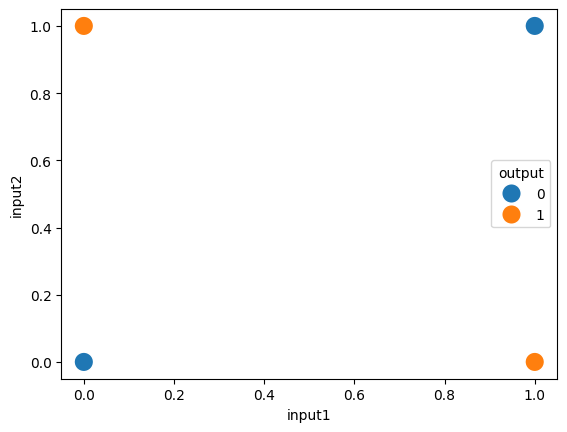

In [140]:
sns.scatterplot(x=xor_data['input1'],y=xor_data['input2'],hue=xor_data['output'],s=200)